In [51]:
import pandas as pd #데이터 구성 패키지 : Series, DataFrame
import numpy as np #행렬 연산 패키지
import matplotlib #데이터 시각화 패키지
import matplotlib.pyplot as plt
import seaborn as sns #데이터 시각화(추세 등)패키지
from scipy import stats #통계 분석 패키지
import scipy.stats 

%matplotlib inline 
#jupyter notebook 내 그래프를 바로 그리기 위한 설정  

In [52]:
matplotlib.rc('font', family='Malgun Gothic') #matplotlib 패키지 한글 깨짐 처리 시작
plt.rc('font', family='Malgun Gothic') 

In [3]:
# weibull 분포에서 확률 계산하기

# 형상모수(alpha) : 2.2
x=1500
alpha=2.2
beta=1200

prob=stats.weibull_min.cdf(x,alpha,scale=beta)
print("P(X>=x):{:3f}".format((1-prob)))

P(X>=x):0.195184


In [4]:
n=3 
for i in range(n+1):
    prob=stats.binom.pmf(k=i, n=n, p=0.4)
    print("P(X={0})={1:3f}".format(i,prob))

P(X=0)=0.216000
P(X=1)=0.432000
P(X=2)=0.288000
P(X=3)=0.064000


In [19]:
#포아송 분포 
mu=2
prob=stats.poisson.pmf(3,mu)
cdf_prob=stats.poisson.cdf(2,mu)
print("1분당 {0}번의 전화가 걸려올 확률: {1:.1f}".format(3,prob*100))
print("1분당 최대 {0}회 이하의 전화가 걸려올 확률: {1:.1f}".format(2,cdf_prob*100))

1분당 3번의 전화가 걸려올 확률: 18.0
1분당 최대 2회 이하의 전화가 걸려올 확률: 67.7


In [10]:
#실습
mu=3
prob1=stats.poisson.cdf(1,mu)
prob2=stats.poisson.pmf(2,mu)
prob3=stats.poisson.cdf(3,mu)
print("{0}명의 손님이 도착할 확률: {1:.1f}%".format(2,prob2*100))
print("{0}명 이하의 손님이 도착할 확률: {1:.1f}%".format(1,prob1*100))
print("{0}명 이상의 손님이 도착할 확률: {1:.1f}%".format(3,(1-prob3)*100))

2명의 손님이 도착할 확률: 22.4%
1명 이하의 손님이 도착할 확률: 19.9%
3명 이상의 손님이 도착할 확률: 35.3%


In [18]:
from scipy.stats import shapiro 
df_camshaft=pd.read_csv("/home/piai/바탕화면/강연주/수업/통계 이해/camshaft.csv", engine='python')
df_camshaft.head()
data1=ds_camshaft['Supp1']
statistic,p=shapiro(data1)
print("Shapiro_Wilk Test: statistic={0:.3f}, p-value={1:.3f}".format(statistic,p)) #H0채택 

Shapiro_Wilk Test: statistic=0.979, p-value=0.107


In [38]:
#실습 
df_2sample=pd.read_csv("/home/piai/바탕화면/강연주/수업/통계 이해/2sample_t_test.csv", engine='python')
df_2sample.head()
sample_1=df_2sample['Mat_A'][0:10] #결측치 제거 
statistic_1,p_1=shapiro(sample_1)
print("Shapiro_Wilk Test: statistic={0:.3f}, p-value={1:.3f}".format(statistic_1,p_1))

Shapiro_Wilk Test: statistic=0.906, p-value=0.256


In [40]:
sample_2=df_2sample['Mat_B'][0:10]
statistic_2,p_2=shapiro(sample_2)
print("Shapiro_Wilk Test: statistic={0:.3f}, p-value={1:.3f}".format(statistic_2,p_2))

Shapiro_Wilk Test: statistic=0.973, p-value=0.917


In [ ]:
m=2.7
sigma=0.397

In [34]:
df=pd.DataFrame({"Sample":[3.6,2.4,2.6,3.0,2.9,2.6,2.9,3.2,2.8,3.4,2.9,2.8,2.6,2.4,2.0,2.6,3.4,2.1,2.7,3.2,3.2,2.6,2.2,3.1,2.2,3.0,2.8,2.9,2.6,2.4,2.7,2.7,2.6,2.7,1.8,2.7,2.4,2.4,2.5,2.2]})
df.head()
lower,upper=stats.norm.interval(0.95,loc=np.mean(df),scale=0.397/np.sqrt(40))
print("신뢰구간: ({0},{1})".format(lower.round(2),upper.round(2)))

신뢰구간: ([2.57],[2.82])


In [36]:
df=pd.DataFrame({'sample':[54.1,53.3,56.1,55.7,54.0,54.1,54.5,57.1,55.2,53.8,54.1,54.1,56.1,55,55.9,56.0,54.9,54.3,53.9,55.0]})
lower,upper=stats.t.interval(0.95,len(df)-1,loc=np.mean(df),scale=scipy.stats.sem(df))
print("신뢰구간:({0},{1})".format(lower.round(2),upper.round(2)))

신뢰구간:([54.39],[55.33])


In [44]:
df=pd.DataFrame({'sample':[74.5,81.2,73.8,82.0,76.3,75.7,80.2,72.6,77.9,82.8]})
t_result=stats.ttest_1samp(df,76.7)
t,p=t_result.statistic.round(3),t_result.pvalue.round(3)
print("1-Sample t-test")
print("t 통계량:{}".format(t))
print("p-value:{}".format(p))

1-Sample t-test
t 통계량:[0.864]
p-value:[0.41]


In [46]:
#실습 평균 검정(모집단 표준편차를 모르는 경우) 
df=pd.DataFrame({'sample': [85.0,79.0,79.1,79.9,81.6,78.6,85.4,83.4,78.1,79.2]}) #데이터 입력 
t_result1

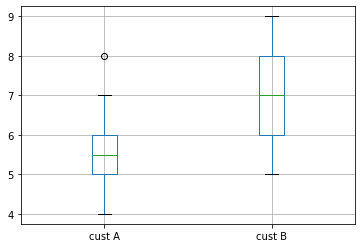

In [54]:
df=pd.read_csv("/home/piai/Downloads/데이터/2sample.csv", engine='python')
df.boxplot(['cust A','cust B'])

In [57]:
#정규성 검정 :Shapiro-Wilk Test
statistic,p=stats.shapiro(df['cust A'])
print("statistic={0:.2f}, p-value={1:.2f}".format(statistic,p))

statistic=0.91, p-value=0.06


In [59]:
#등분산성 test : equal variance test 
stats.levene(df['cust A'],df['cust B'])#p-value가 0.05보다 크므로 귀무가설을 채택한다.두 집단의 분산은 같다고 할 수 있다. 

LeveneResult(statistic=0.04810126582278468, pvalue=0.8275746090758196)

In [63]:
# 2 sample t-test 
t_result=stats.ttest_ind(df['cust A'], df['cust B'], equal_var=True) #서로 분산이 같다고 놓고 test

#2-sample t-test의 t값 p값 저장
t,p=t_result.statistic.round(3), t_result.pvalue.round(3)

#2-sample t-test의 t값 p값 출력
print("2-Sample t_test")
print("t검정통계량 : {}".format(t))
print("p-value: {}".format(p)) #p-value가 유의수준보다 작으므로 대립 가설을 채택한다 H1채택 

2-Sample t_test
t검정통계량 : -3.596
p-value: 0.001


In [ ]:
# 실습 
df=pd.DataFrame({'sample':[86]})

In [73]:
# Paired t-test 
df=pd.read_csv("/home/piai/Downloads/데이터/paired.csv", engine='python')
df_b=df['before']
df_a=df['after']
t_result=stats.ttest_rel(df_b,df_a)
t,p=t_result.statistic.round(3), t_result.pvalue.round(3)

print("Paired t-test")
print('t검정 통계량=%.3f, pvalue=%.3f'% t_result) #pvalue가 0.05보다 작으므로 대립 가설을 채택한다.학원 가기 전후 성적차이가 크다. 

Paired t-test
t검정 통계량=-5.324, pvalue=0.000


In [76]:
# 1 proportion test 
from statsmodels.stats.proportion import proportions_ztest
count=15
n_obs=100
value=0.1
stat,pval=proportions_ztest(count,n_obs,value)

print("1 Proportion test")
print("z: {0:0.3f}".format(stat))
print("p: {0:0.3f}".format(pval)) #p-value가 0.05보다 크므로 귀무 가설을 채택한다. 

1 Proportion test
z: 1.400
p: 0.161


In [78]:
from statsmodels.stats.proportion import proportions_ztest
count=40
n_obs=100
value=0.5
stat,pval=proportions_ztest(count,n_obs,value)

print("1 Proportion test")
print("z: {0:0.3f}".format(stat))
print("p: {0:0.3f}".format(pval)) #p-value가 0.05보다 작으므로 대립 가설을 채택한다. 동전이 앞면이 나올 확률은 0.5%가 아닐 수 있다. 

1 Proportion test
z: -2.041
p: 0.041


In [77]:
# 2 proportion test #
#변수 선언
count=np.array([4,1])
nobs=np.array([1000,1200])

#Proportion test 실행
stat,pval=proportions_ztest(count,nobs)

#Proportion test 결과 출력
print("2 proportion test")
print('z검정통게량 : {0:0.3f}'.format(stat))
print('p-value:{0:0.3f}'.format(pval)) #p-value가 0.05보다 크므로 귀무 가설을 채택한다. 

2 proportion test
z검정통게량 : 1.553
p-value:0.120
